In [1]:
import numpy as np
import os,sys
%matplotlib inline
sys.path.append("D:/measuring/")
sys.path.append(r'D:/measuring/analysis')
import analysis.lib.fitting.common as fitlib
from analysis.lib.Qmemory import CarbonDephasing as CD
reload(CD)
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import matplotlib
reload(matplotlib)

matplotlib.rc('pdf', fonttype=42)
%matplotlib inline

reloaded
d:\measuring\data
d:\measuring\data
reloaded
d:\measuring\data
reloaded
d:\measuring\data


# Repump Speed

d:\measuring\data
reloaded
folder is  d:\measuring\data\20160705\174022_purifcation slave_111no2_SIL2_repump_speed
Converged with chi squared  0.0311709812537
degrees of freedom, dof  95
RMS of residuals (i.e. sqrt(chisq/dof))  0.0181139612494
Reduced chisq (i.e. variance of residuals)  0.000328115592144

fitted parameters at minimum, with 68% C.I.:
 0 A              0.774679 +/-   0.041411
 1 tau           55.084740 +/-   5.719453
 2 tau2         291.676275 +/-  38.775147
 3 offs_x        21.642115 +/-   2.450092

correlation matrix:
               A         tau       tau2      offs_x    
         A  1.000000
       tau  0.845565  1.000000
      tau2  0.937900  0.733828  1.000000
    offs_x -0.451084 -0.778733 -0.383756  1.000000



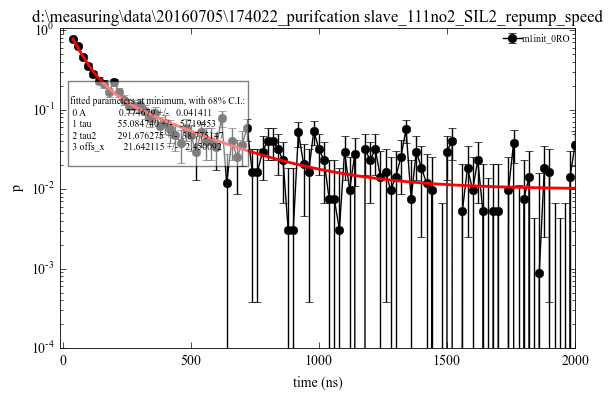

In [3]:
reload(CD)
CD.repump_speed(
    #timestamp='20160510_152240',
    powers = [1000e-9], exclude_first_n_points = 2, log_plot = True,
    amplitude =0.2, decay_constant_one = 200., decay_constant_two = 400., x_offs = 0, offset=0.01, fixed = [0], 
    do_plot = True, do_fit = True, print_fit = True, plot_fit=True,  plot_fit_guess = False, 
    init_states=['m1'], ro_states=['0'])

# Fit exponential decay

d:\measuring\data
reloaded
True
Converged with chi squared  0.0474591677461
degrees of freedom, dof  14
RMS of residuals (i.e. sqrt(chisq/dof))  0.0582231960072
Reduced chisq (i.e. variance of residuals)  0.00338994055329

fitted parameters at minimum, with 68% C.I.:
 0 A              1.035801 +/-   0.033308
 1 tau          245.570610 +/-  19.649435

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.768524  1.000000

Converged with chi squared  0.0419054854157
degrees of freedom, dof  14
RMS of residuals (i.e. sqrt(chisq/dof))  0.0547105927428
Reduced chisq (i.e. variance of residuals)  0.00299324895827

fitted parameters at minimum, with 68% C.I.:
 0 A              0.952325 +/-   0.030588
 1 tau          286.462280 +/-  25.515855

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.780165  1.000000

Converged with chi squared  0.0457899921217
degrees of freedom, dof  14
RMS of residuals (i.e. sqrt(chisq/do

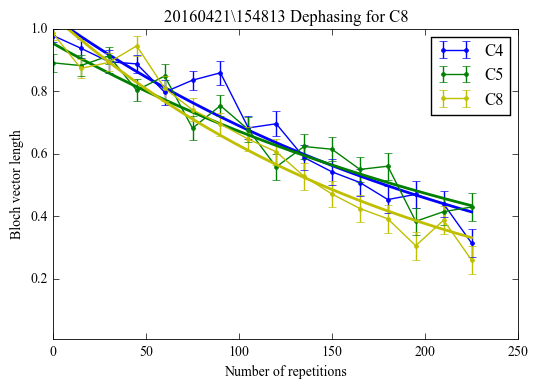

In [21]:
reload(CD) 
carbons = ['4','5','8']
logicstate_list = ['X']*len(carbons) # Only effective for two-carbon DPS
X_measurement = True
older_than = '20160418_140944'
older_than = None

CD.Sweep_Rep_List(folder_name = 'NoOfRepetitions', carbons = carbons,
                  logicstate_list = logicstate_list,
                  fit_results = True,
                  ssro_calib_timestamp = None,
                  do_T2correct = False,
                  ymin = 0.01, #uncomment to get minimum of data
                  is_X_measurement = X_measurement,
                  older_than = older_than, #remeber this also changes SSRO calibration!')
                  log_plot = False)

# Fit average repump time

In [48]:
### routine gets raw data for 'X' and 'Y' tomography of a carbon and plots it.
reload(CD)
older_than = '20160412_135526'
older_than = None
is_X_measurement = True
do_T2correct = False

CD.Sweep_Rep_List(carbons = ['4','5'],
    folder_name = 'Memory_Sweep_repump_time_', older_than = older_than, #older than also changes SSRO calib
    do_T2correct = do_T2correct, is_X_measurement = is_X_measurement, ymin=0.0,
    fit_result=True, fitGauss=True, return_fit_params = False)

d:\measuring\data
reloaded


IndexError: index out of bounds

d:\measuring\data
reloaded
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


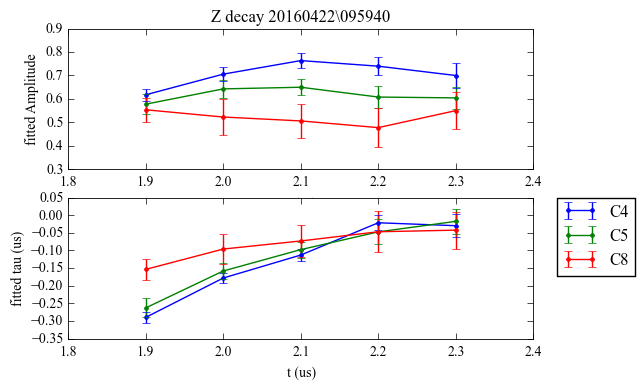

In [86]:
### routine gets raw data for 'X' and 'Y' tomography of a carbon and plots it.
reload(CD)
older_than = '20160422_050813'
older_than = None
is_X_measurement = False
do_T2correct = False
plot_individual_fits = False
CD.sweep_avg_repump_and_tau_larmor(carbons = ['4','5','8'], tau_larmor_list = np.arange(1.9,2.4,0.1),
    folder_name = 'Memory_Sweep_repump_time_', older_than = older_than, #older than also changes SSRO calib
    do_T2correct = do_T2correct, is_X_measurement = is_X_measurement,do_plot_results = plot_individual_fits)

## Coupling strength vs repetition decay

In [ ]:
reload(CD)
reload(fitlib)
fig = plt.figure()
ax = plt.subplot()

update_data = True
do_T2correct = False
LogPlot = True
c_idents = ['1','2']
older_than = '20160401_112029'

    
def update_data_func(c_idents,older_than,do_Z = False):

    ### get bloch vector decay
    x,y,y_u,folder = CD.coupling_vs_repetitions(c_idents,older_than = older_than, #SSRO_timestamp = '20160404_152948',
                                                folder_name = 'Memory_NoOfRepetitions_', do_T2correct=do_T2correct)
    y = y[np.argsort(x)]
    y_u = y_u[np.argsort(x)]
        
    print 'update done!!'
    
    if do_Z == False:
        x = np.sort(x*1e-3)
        return x,y,y_u,folder
    
    Z_fits = Z_fits[np.argsort(x)]
    Z_fits_u = Z_fits_u[np.argsort(x)]
    x = np.sort(x*1e-3)
    return x,y,y_u,Z_fits,Z_fits_u,folder

if update_data:
    x,y,y_u,folder = update_data_func(c_idents,older_than = older_than,do_Z = False) # 2 uW break

plt.errorbar(x,y,y_u,fmt = 'ro', label = 'Pippin')

plt.legend(loc=1)#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Coupling strength (kHz)')   
plt.ylabel('Fitted decay constant')
if older_than != None:
    plt.title('older_than ' + older_than)
else:
    plt.title(CD.get_tstamp_from_folder(folder))

if LogPlot:
    plt.ylim([10,2000])
    plt.xlim([2,100])
    #ax.set_xscale("log", nonposy='clip')
    ax.set_yscale("log", nonposy='clip')
else:
    plt.ylim([0,1000])
#print x== x4
#print x
#print x4
#print folder
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1,0.0005,0)
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_tau(1,0.001,0)
p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_coupl(1,0.0005,0)
#p0,fitfunc,fitfunc_str =fitlib.fit_exp_decay_shifted_with_offset(0,700,40,0) # g_a : offset g_A : initial Amplitude g_tau : decay constant g_x0 : x offse
if False:  # Show Guess
    ax.plot(np.linspace(2,90,201), fitfunc(np.linspace(2,90,201)), ':', lw=2)
    print 'fitfun value ', fitfunc(np.linspace(2,90,21))

#x_fit, y_fit, y_u_fit = numpy.concatenate((x[0:],x_s)), numpy.concatenate((y[0:],y_s)), numpy.concatenate((y_u[0:],y_u_s))

fit_result1 = fit.fit1d(x, y, None, p0 = p0, fitfunc = fitfunc, do_print = True, ret = True, fixed = [0,2])
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1,0.0005,0.08)
p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_coupl(1,0.0005,0)
#plot.plot_fit1d(fit_result1, np.linspace(3,100,1001), ax=ax, color = 'r', plot_data=False, add_txt = False, lw = 2)

if False:
    print 'saving to ', folder
    plt.savefig(os.path.join(folder,'coupling_vs_repetitions.pdf'),format='pdf')
    plt.savefig(os.path.join(folder,'coupling_vs_repeititons.png'),format='png')
plt.show()
plt.close('all')

In [ ]:
reload(CD)
# CD.Osci_period(carbon = '5',older_than = None,freq=0,fixed = [0,1,3])
# CD.Osci_period(carbon = '2',older_than = None)
CD.Osci_period(carbon = '2',older_than = None,fit_results = True)

## Initialization values for various carbons (execute script 3Qubit_inits)

In [ ]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)
carbon_combinations = [[1,2,3],[1,2,5],[1,2,6],[1,3,5],[1,3,6],[1,5,6],[2,3,5],[2,3,6],[2,5,6],[3,5,6]]
# carbon_combinations = [[1,2,5]]
for kk in carbon_combinations:
    x_label,x,res,res_err = Tomo2.BarPlotTomoContrast(tag = '_'+str(kk[0])+str(kk[1])+str(kk[2])+'_init',
                                                      plot_fit = False, 
                                                      return_data = True,
                                                      save = False)
    print 'Carbons {} {} {}: {} {:.2} +- {:.2} and {} {:.2} +- {:.2}'.format(kk[0],kk[1],kk[2],x_label[0],res[0],res_err[0],x_label[1],res[1],res_err[1])

#### Laser stability

In [ ]:
from analysis.lib.Qmemory import CheckLaserPower as Laser; reload(Laser)

Laser.CheckPower('NewfocusAOM','ADWIN',nr_of_files=10)
Laser.CheckPower('MatisseAOM','ADWIN',nr_of_files=10)

# Memory Paper Plots

In [ ]:
reload(CD)
binwidth = [None,None,None,None,None]
binwidth = [12,12,25,25,25]
start_tstamps = ['20151105_032629','20151031_182230','20151025_235900','20151024_131500','20151024_233353' ]
stop_timestamps = [ '20151103_211016','20151030_220005','20151025_102306','20151023_193751','20151024_145547']
CD.repump_speed_paper_plot(older_than=start_tstamps, newer_than=stop_timestamps, binwidth_ns=binwidth,
        exclude_first_n_points = [5,7,2,2,2], offset = [0.,0.,0.,0.,0.], amplitude = [0.8,0.8,0.8,0.8, 0.8], 
        x0 = [0.,0.,0.,0., 0.], decay_constant_one = [50, 20,300,150,200],
        decay_constant_two = [500.,523.,800.,800.,500.], labels = ['E 2000 nW','A 2000 nW','A 190 nW','A 100 nW','A 50 nW'],
        x_offs=[0,0,0,0,0], colors=['y','g','c','b','k'], cutoff_ns = [1000,1200,1800,2500,1000],#[800,2200,1200,1500],
        plot_fit = True, do_print = False, fixed = [[0],[0],[0],[0],[0]], show_guess = False)

In [ ]:
reload(CD)
tstamps_E = ['20151219_215910','20151219_215525','20151219_215138']#,
tstamps_A = ['20151221_161917','20151221_161445','20151221_161024']
CD.repump_speed_pm1_paper_plot(tstamps_E=tstamps_E,tstamps_A=tstamps_A, binwidth_ns=[17,17,17], 
        labels = [r'$p_{\left|+1\right\rangle}$',r'$p_{\left|-1\right\rangle}$',r'$1-p_{\left|0\right\rangle}$'], #ssro_calib_timestamp=['20151221_160634',None],
        exclude_first_n_points_A = [6,6,6], exclude_first_n_points_E = [12,12,12], offset = [0.,0.,0.], amplitude = [0.2,0.7,0.7], x0 = [0.,0.,0.], decay_constant_one = [50,50,50], 
        decay_constant_two = [440.,440.,440.], x_offs=[-200,0,0], colors=['k','r','b','g'], cutoff_ns = [600,600,600],
        plot_fit = True, do_print = False, marker = ['+', 'x', '.'], fixed = [[0,3,4],[0,2,3],[0,2,3]], show_guess = False)

In [ ]:
reload(CD)
f_name = 'Memory_Sweep_repump_time_'
older_than = '20151022_190000'#'20151022_220000'
CD.avg_repump_time_paper_plot(carbons = ['1','5','2','3'], colors=['b','c','g','y'],
                              folder_name = f_name, older_than = older_than, save=False, fig_name = 'Fig3a_avgRPtime', CR_after_check=False) 

In [ ]:
reload(CD) 
# CD.Sweep_Rep_List(carbons = ['3','6'],older_than = '20151102_080000', save=True) 
older_than = '20151102_080000'
logicstate_list = ['X']*5 # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(carbons = ['6','1','5','2','3'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=True, older_than = older_than, 
            x_max = 800, colors = ['k','b','c','g','y'],  plotquantum = True, plotclassical = True, fig_name='Fig3_XDecay', plotlabel ='(b)')
logicstate_list = ['X','X','X','mX'] # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(carbons = ['5','2','25','25'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=True, older_than = older_than,plotquantum = True,plotclassical = True,
            x_max=2300, colors = ['c','g','m','r'], fig_name='Fig4a_DFS', plotlabel ='(a)')

In [ ]:
reload(CD)

update_data = True
try:  #does last data exist?
    dummy = lastdata
except:
    print 'No last data'
    update_data = True
    lastdata=None

do_T2correct = True
LogPlot = True

c_idents = ['1','2','3','5','6','12','13','15','16','23','25','26','35','36','56']
#c_idents = ['1','2','15','16']

older_than_list=['20151105_050000', '20151102_080000','20151026_020000','20151024_131500','20151025_030000']
labels = ['E 2000 nW', 'A 2000 nW','A 190 nW','A 100 nW','A 50 nW']
styles = ['yo', 'go', 'co', 'bo',  'ko']
fit_colors = ['y','g','c', 'b' ,'k']   # no color assigned means no fit is done.

lastdata = CD.coupling_vs_rep_paper_plot(c_idents=c_idents, older_than_list=older_than_list, 
                labels = labels, styles=styles, fit_colors=fit_colors, LogPlot=LogPlot, 
                fixed = [[0],[0],[0],[0],[0]], CR_after_check=True,
                update_data=update_data, lastdata = lastdata, do_T2correct=do_T2correct, 
                fit_guess = (1,0.00044,0), fit_guess_art = (1, 0.00044,0))

In [2]:
reload(CD)
#tstamps = ['20151030_164714','20151030_165302','20151103_185409'] #'20150826_102333'], #A1 only: '20150902_142407']
start_tstamps = ['20151203_150419','20151203_150117','20151203_150815']#,'20150902_142407'] #'20150826_102333'], #A1 only: '20150902_142407'],
stop_timestamps = ['20151203_150117','20151203_145911','20151203_150649']
binwidth_ns = [None,None,20]
tau, tau_err = CD.repump_speed_paper_plot(older_than=start_tstamps, newer_than=stop_timestamps, binwidth_ns=binwidth_ns,
        exclude_first_n_points = [6,6,6], offset = [0.0,0.0,0.0], amplitude = [0.8,0.8,0.8], x0 = [0.,0.,0.], decay_constant_one = [30,30,30], 
        decay_constant_two = [300.,300.,300], x_offs=[0,0.0,10], colors=['r','k','b','g'],
        plot_fit = True, do_print = False, fixed = [[0],[0],[]], show_guess = False, invert=[True,False,False,True])

NameError: name 'CD' is not defined

In [53]:
A_list = [[] for i in enumerate([2,2,2])]
print A_list

[[], [], []]


In [51]:
x.insert([0])

TypeError: insert() takes exactly 2 arguments (1 given)